In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from tqdm import tqdm
%matplotlib inline


### Đọc file dữ liệu

In [4]:
df = pd.read_csv('Data/data_price_house_processing.csv')

In [6]:
df.sample(5)

Giá  Diện tích  Mặt tiền  Đường trước nhà  Số tầng  Số phòng  \
24431    4.8       99.0       1.0              1.0      4.0       3.0   
7049     4.0       78.0       1.0              3.0      1.0       3.0   
30034  110.0      100.0       5.0             15.0      2.0       4.0   
23247   11.5       60.0       1.0              1.0      5.0       4.0   
34241    2.4      224.0       1.0              1.0      1.0       1.0   

       Số toilet  Nội thất_cơ bản  Nội thất_không  Nội thất_đầy đủ  
24431        2.0                0               1                0  
7049         1.0                0               1                0  
30034        3.0                0               1                0  
23247        4.0                0               1                0  
34241        1.0                0               1                0

### Kiểm tra thông tin các cột

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36291 entries, 0 to 36290
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Giá              36291 non-null  float64
 1   Diện tích        36291 non-null  float64
 2   Mặt tiền         36291 non-null  float64
 3   Đường trước nhà  36291 non-null  float64
 4   Số tầng          36291 non-null  float64
 5   Số phòng         36291 non-null  float64
 6   Số toilet        36291 non-null  float64
 7   Nội thất_cơ bản  36291 non-null  int64  
 8   Nội thất_không   36291 non-null  int64  
 9   Nội thất_đầy đủ  36291 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 2.8 MB


### Kiểm tra phân phối của các cột

In [9]:
df.describe()

Giá     Diện tích      Mặt tiền  Đường trước nhà  \
count  36291.000000  36291.000000  36291.000000     36291.000000   
mean      25.388928     87.542724      4.721611         5.379764   
std      100.059486     82.203376      7.684808         7.384321   
min        0.100000      1.000000      1.000000         1.000000   
25%        3.600000     43.000000      1.000000         1.000000   
50%        5.600000     62.000000      4.000000         3.000000   
75%       10.500000    100.000000      5.000000         6.000000   
max      999.000000    975.600000    100.000000       100.000000   

            Số tầng      Số phòng     Số toilet  Nội thất_cơ bản  \
count  36291.000000  36291.000000  36291.000000     36291.000000   
mean       2.866330      3.225097      2.833926         0.025902   
std        2.201709      3.582697      3.419822         0.158844   
min        1.000000      1.000000      1.000000         0.000000   
25%        1.000000      1.000000      1.000000         0.000000   
50%        3.000000      3.000000      2.000000         0.000000   
75%        4.000000      4.000000      4.000000         0.000000   
max       58.000000    100.000000    100.000000         1.000000   

       Nội thất_không  Nội thất_đầy đủ  
count    36291.000000     36291.000000  
mean         0.885068         0.089030  
std          0.318944         0.284791  
min          0.000000         0.000000  
25%          1.000000         0.000000  
50%          1.000000         0.000000  
75%          1.000000         0.000000  
max          1.000000         1.000000

### Kiểm tra số hàng số cột

In [11]:
df.shape

(36291, 10)

In [33]:
value_counts_series = df['Giá'].value_counts()
print(value_counts_series)
# Lọc các giá trị có count lớn hơn 1
filtered_values = value_counts_series.index[value_counts_series > 100]
filtered_values.max()

4.0      860
5.6      842
3.0      803
5.0      758
3.8      641
        ... 
196.0      1
48.9       1
48.6       1
72.9       1
48.5       1
Name: Giá, Length: 665, dtype: int64


650.0

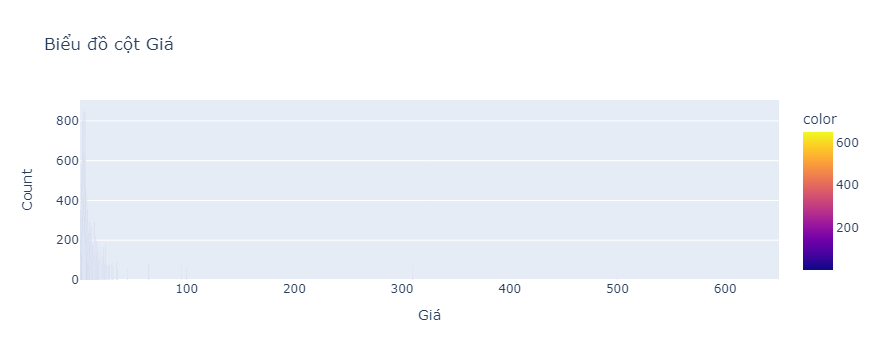

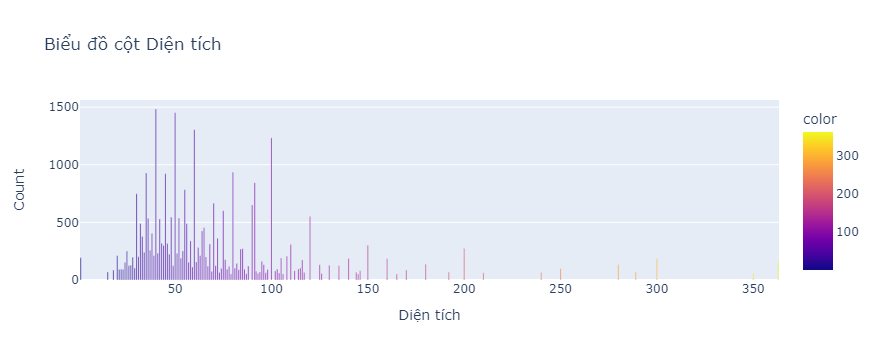

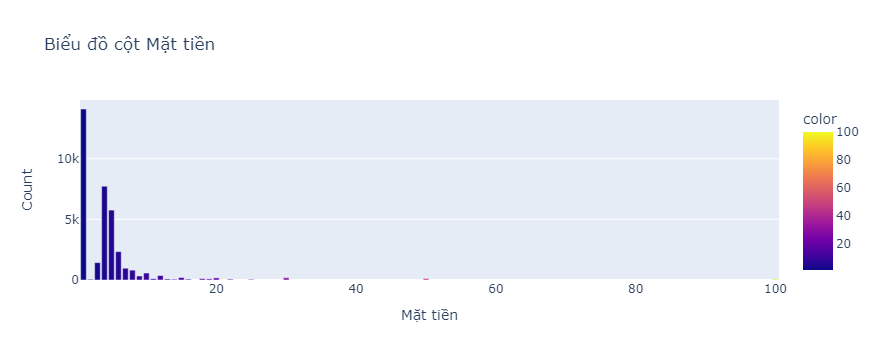

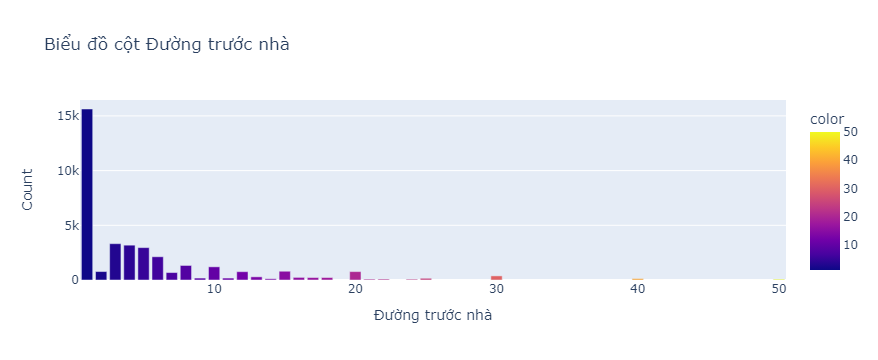

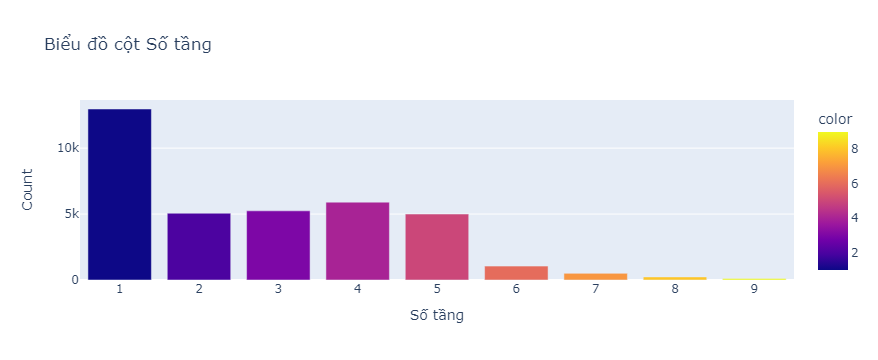

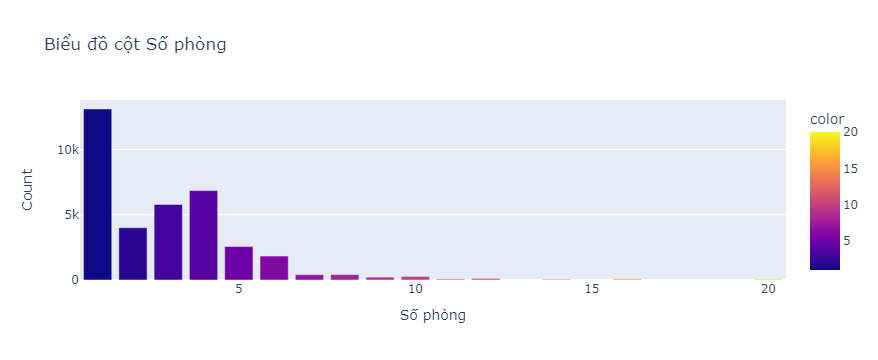

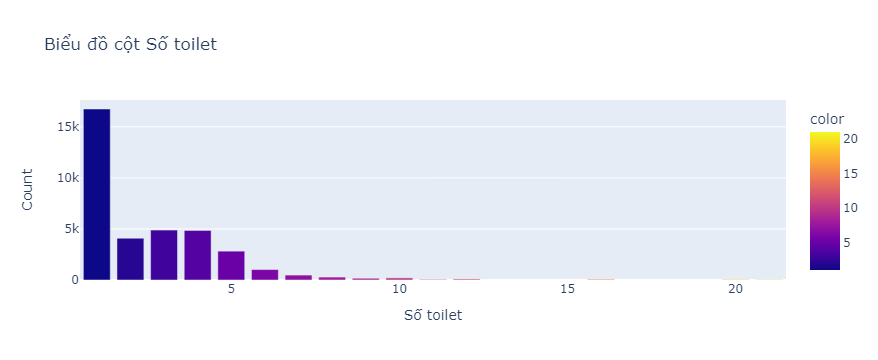

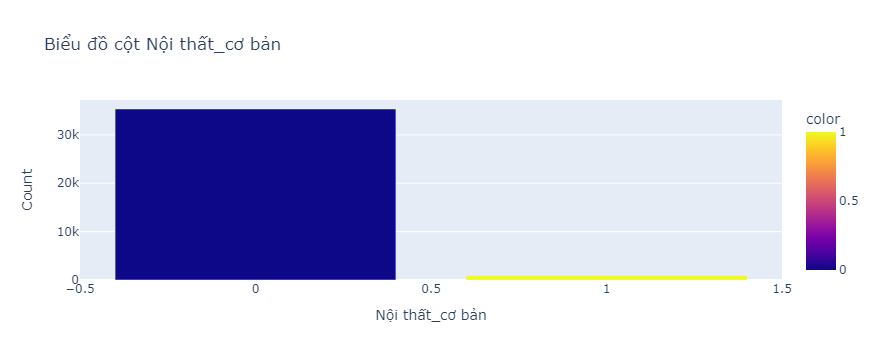

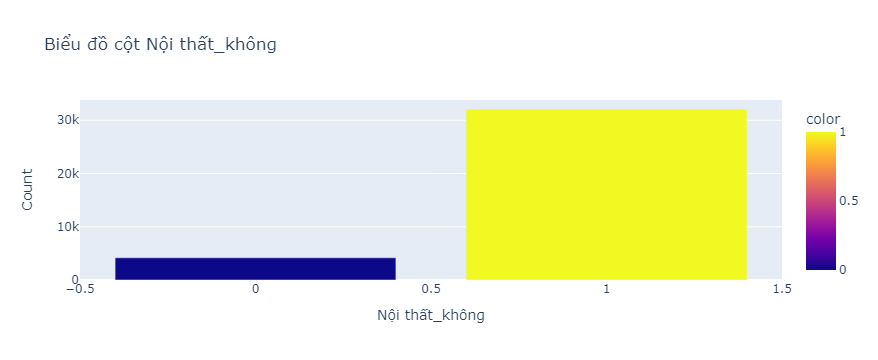

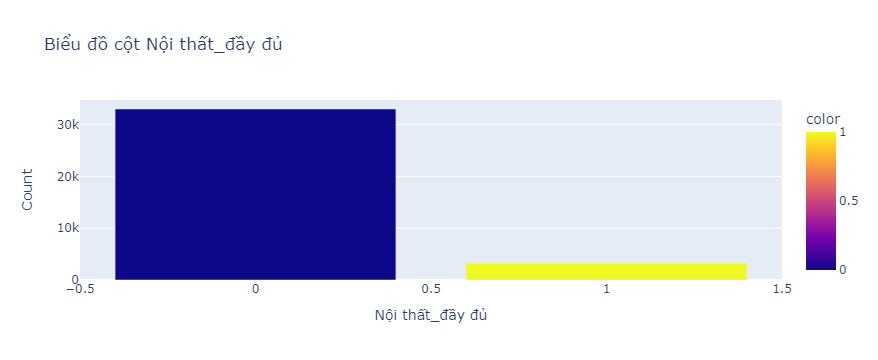

In [39]:
for col in df.columns:
    # Tính toán value_counts và sắp xếp theo giảm dần
    value_counts_sorted = df[col].value_counts().sort_values(ascending=False)
    
    # Lấy những giá trị tập trung đông (có thể điều chỉnh ngưỡng theo nhu cầu của bạn)
    threshold = 50
    top_values = value_counts_sorted[value_counts_sorted > threshold]
    
    # Vẽ biểu đồ
    fig = px.bar(
        x=top_values.index,
        y=top_values.values,
        labels={"x": col, "y": "Count"},
        title=f"Biểu đồ cột {col}",
        color=top_values.index
    )
    fig.show()

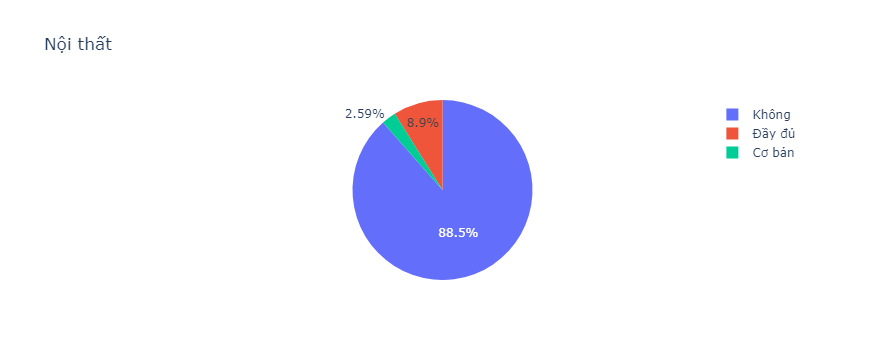

In [46]:
size = []
for _ in df.columns[7:]:
    i = df[_].value_counts()[1]
    size.append(i)

px.pie(
    # df,
    names={'0' : 'Cơ bản', '1' : 'Không','2':'Đầy đủ'},
    values=size,
    title="Nội thất",
)

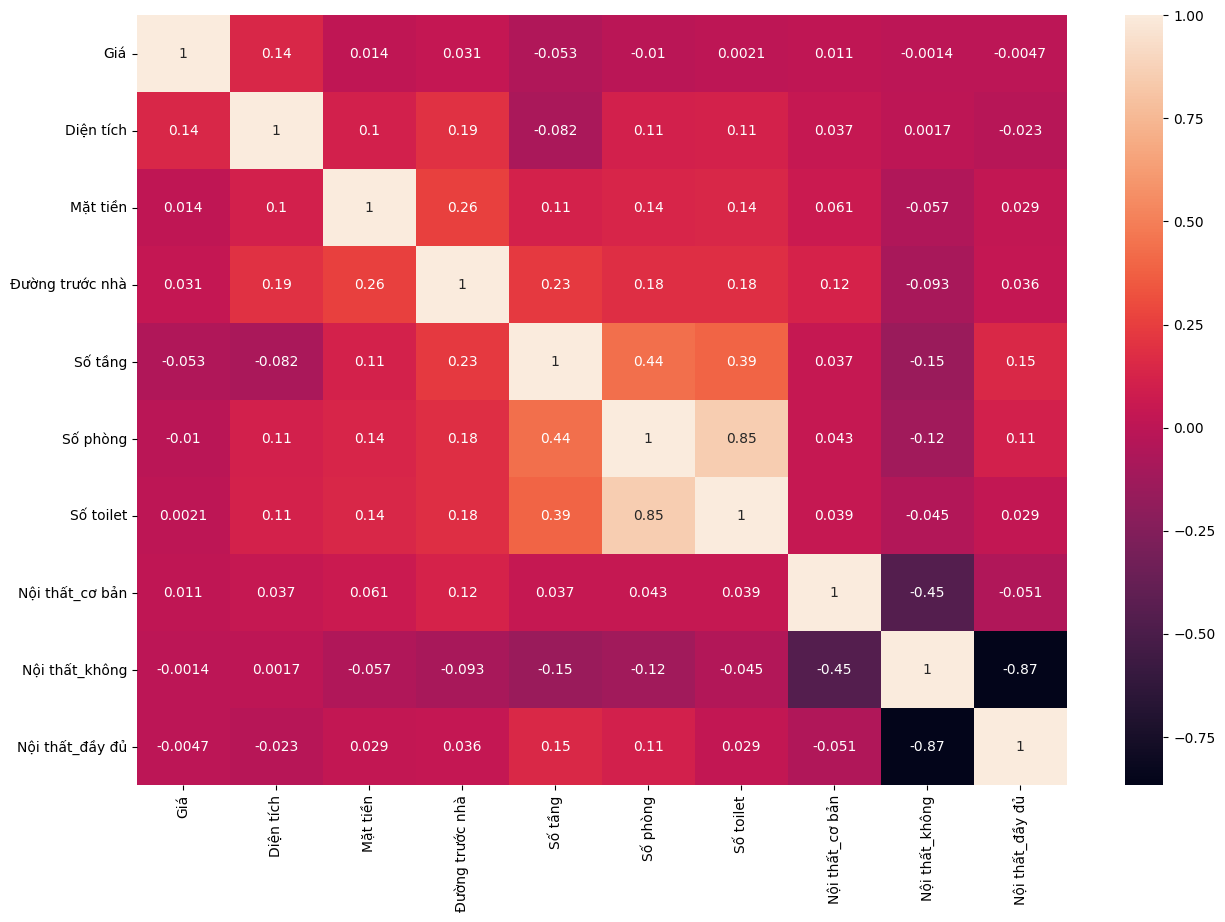

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True);

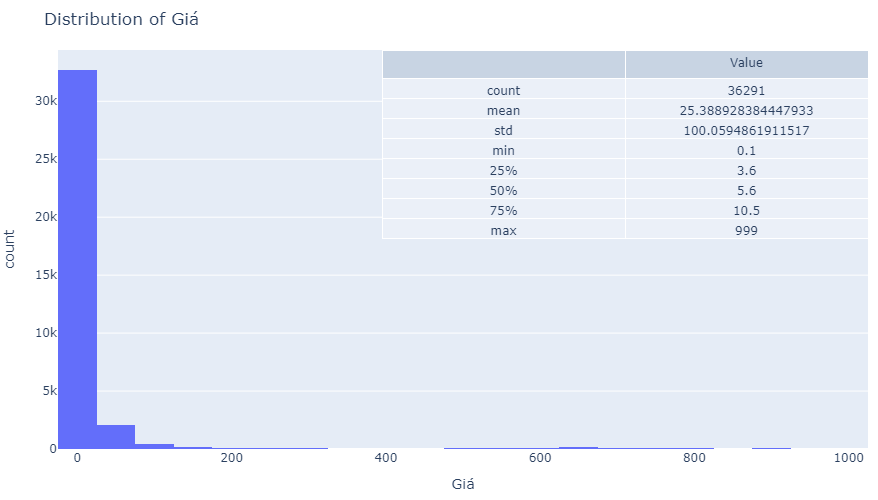

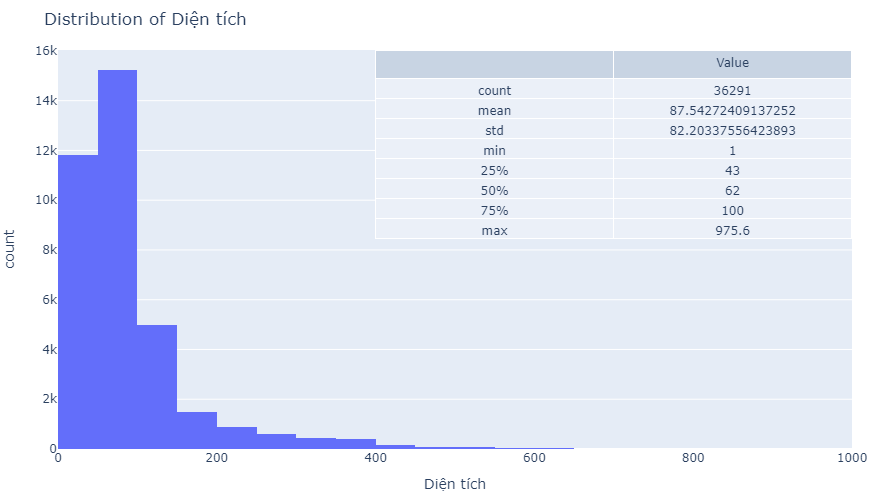

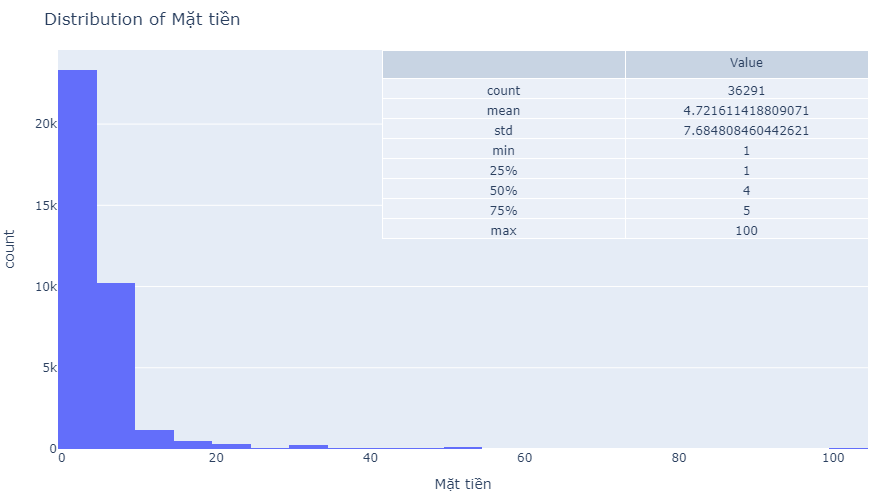

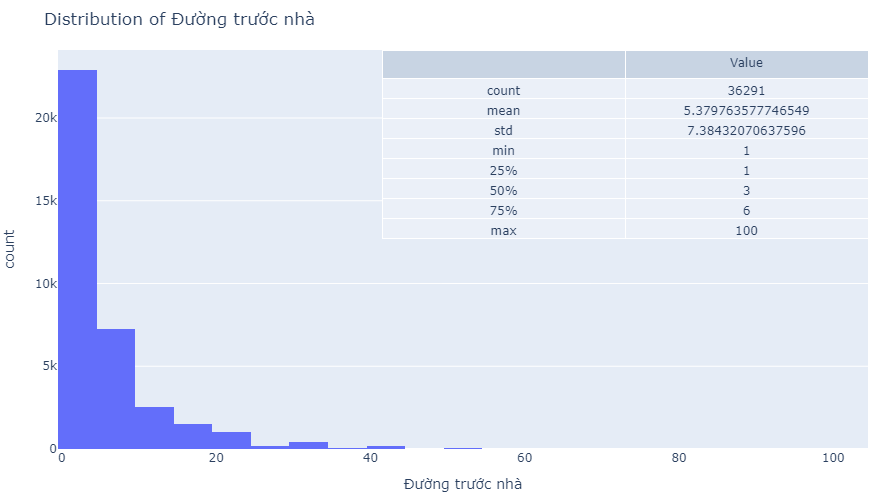

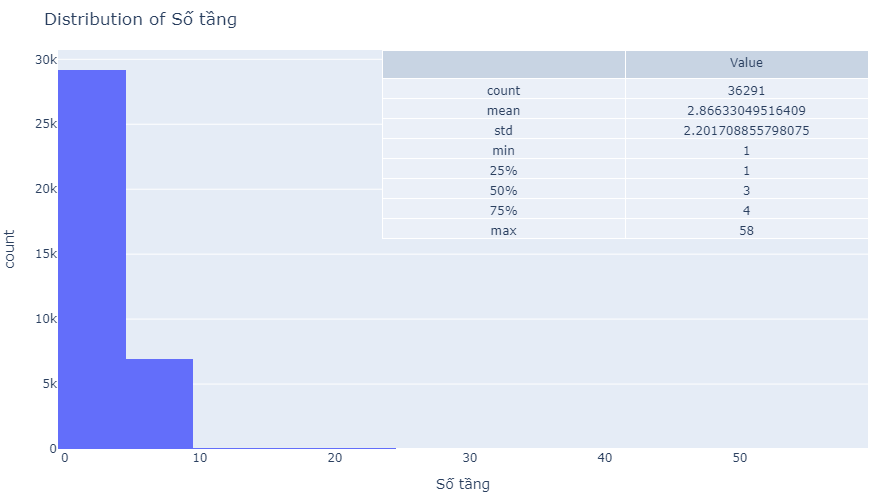

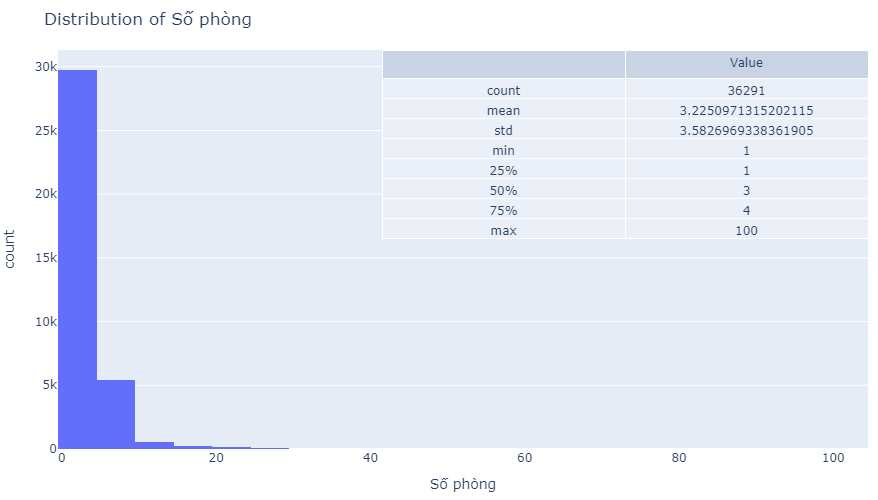

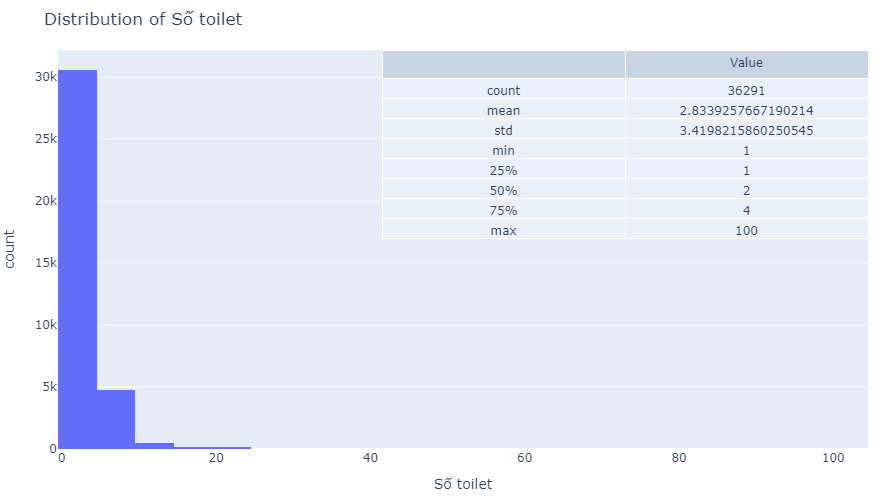

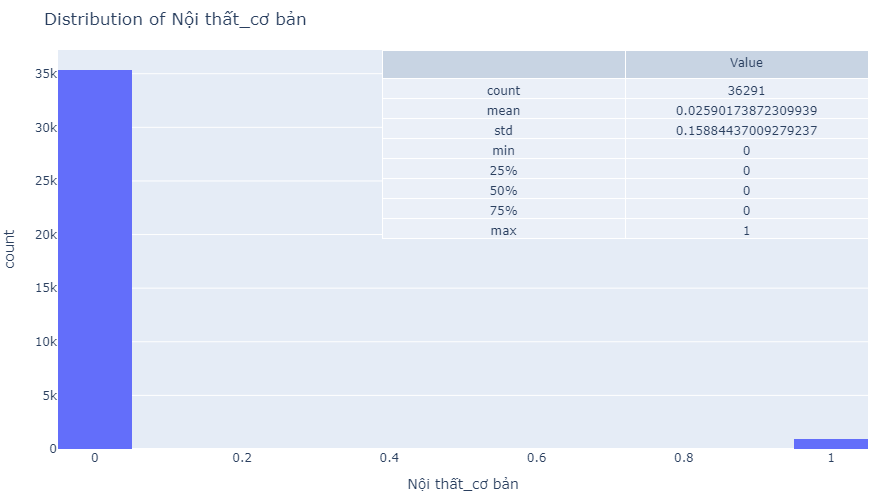

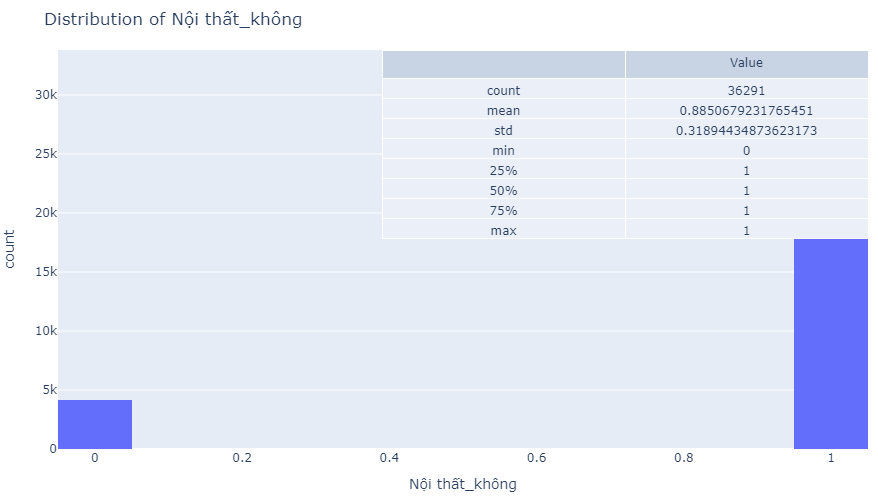

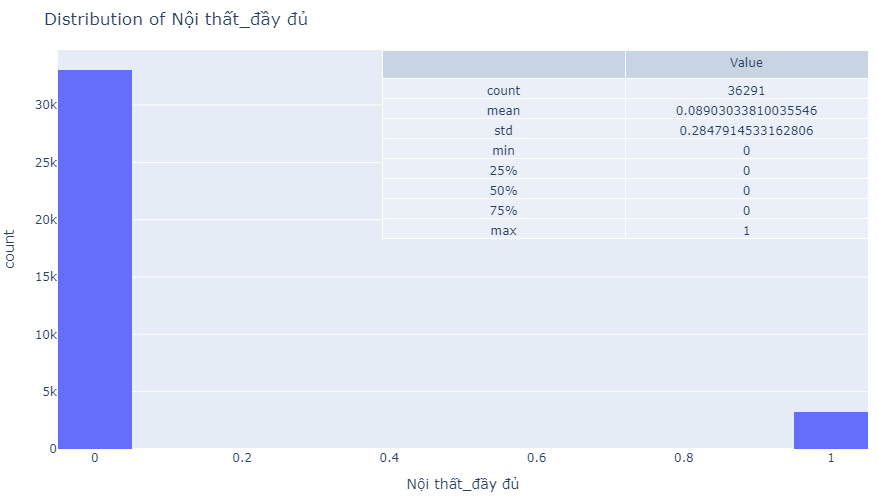

In [77]:
import plotly.graph_objects as go
import plotly.express as px

for column in df.columns:
    # Vẽ biểu đồ histogram
    fig = px.histogram(df, x=column, nbins=20, title=f"Distribution of {column}")
    
    # Tạo bảng thông tin tóm tắt
    summary_stats = df[column].describe().reset_index().rename(columns={column: 'Value'})
    table = go.Figure(data=[go.Table(
        header=dict(values=["", "Value"]),
        cells=dict(values=[summary_stats['index'], summary_stats['Value']])
    )])
    
    # Hiển thị biểu đồ và bảng bên cạnh nhau
    fig.add_trace(go.Table(
        header=dict(values=["", "Value"]),
        cells=dict(values=[summary_stats['index'], summary_stats['Value']]),
        domain=dict(x=[0.4, 1], y=[0.5, 1])
    ))
    
    # Cài đặt layout để biểu đồ và bảng không trùng nhau
    fig.update_layout(
        margin=dict(t=50, l=10, r=10, b=10),
        showlegend=False
    )
    
    # Cài đặt chiều cao của biểu đồ
    fig.update_layout(height=500)
    
    # Hiển thị biểu đồ và bảng
    fig.show()


<Figure size 1000x800 with 0 Axes>

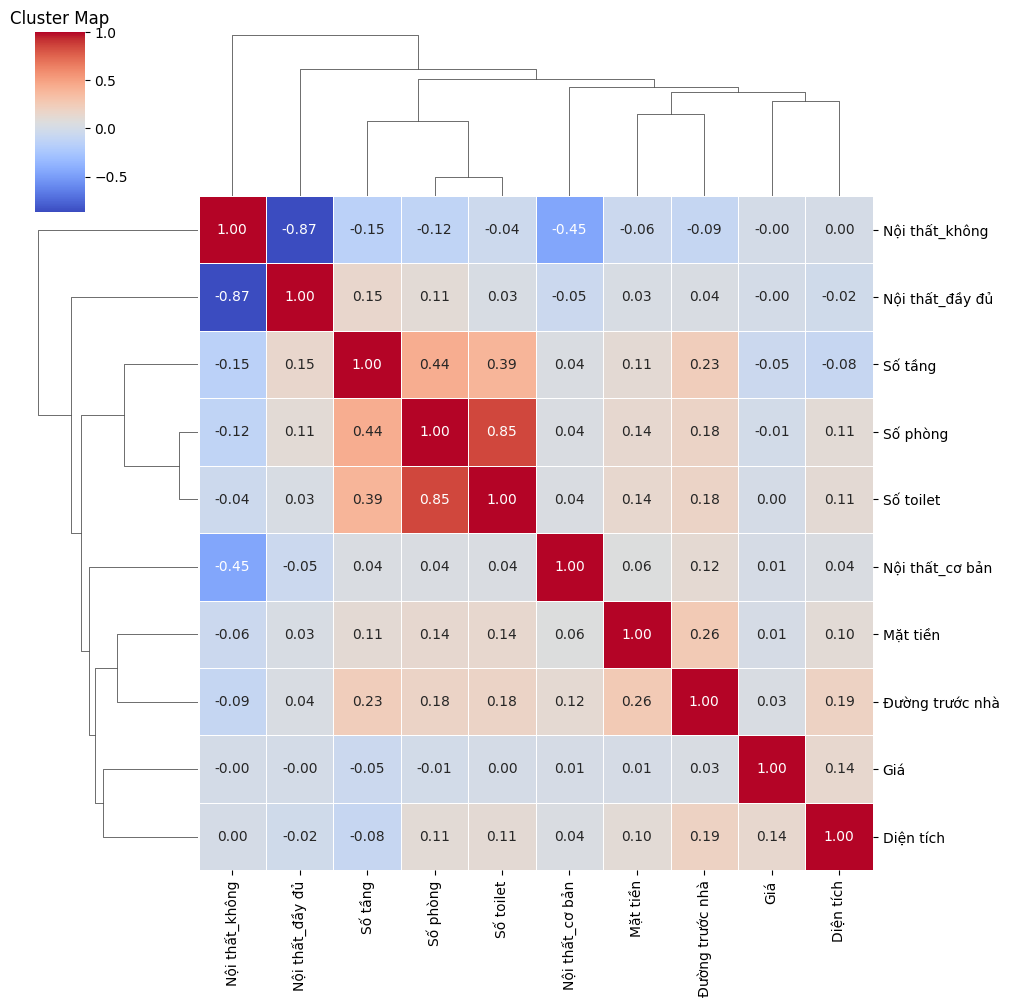

In [78]:
plt.figure(figsize=(10, 8))
sns.clustermap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Cluster Map")
plt.show()

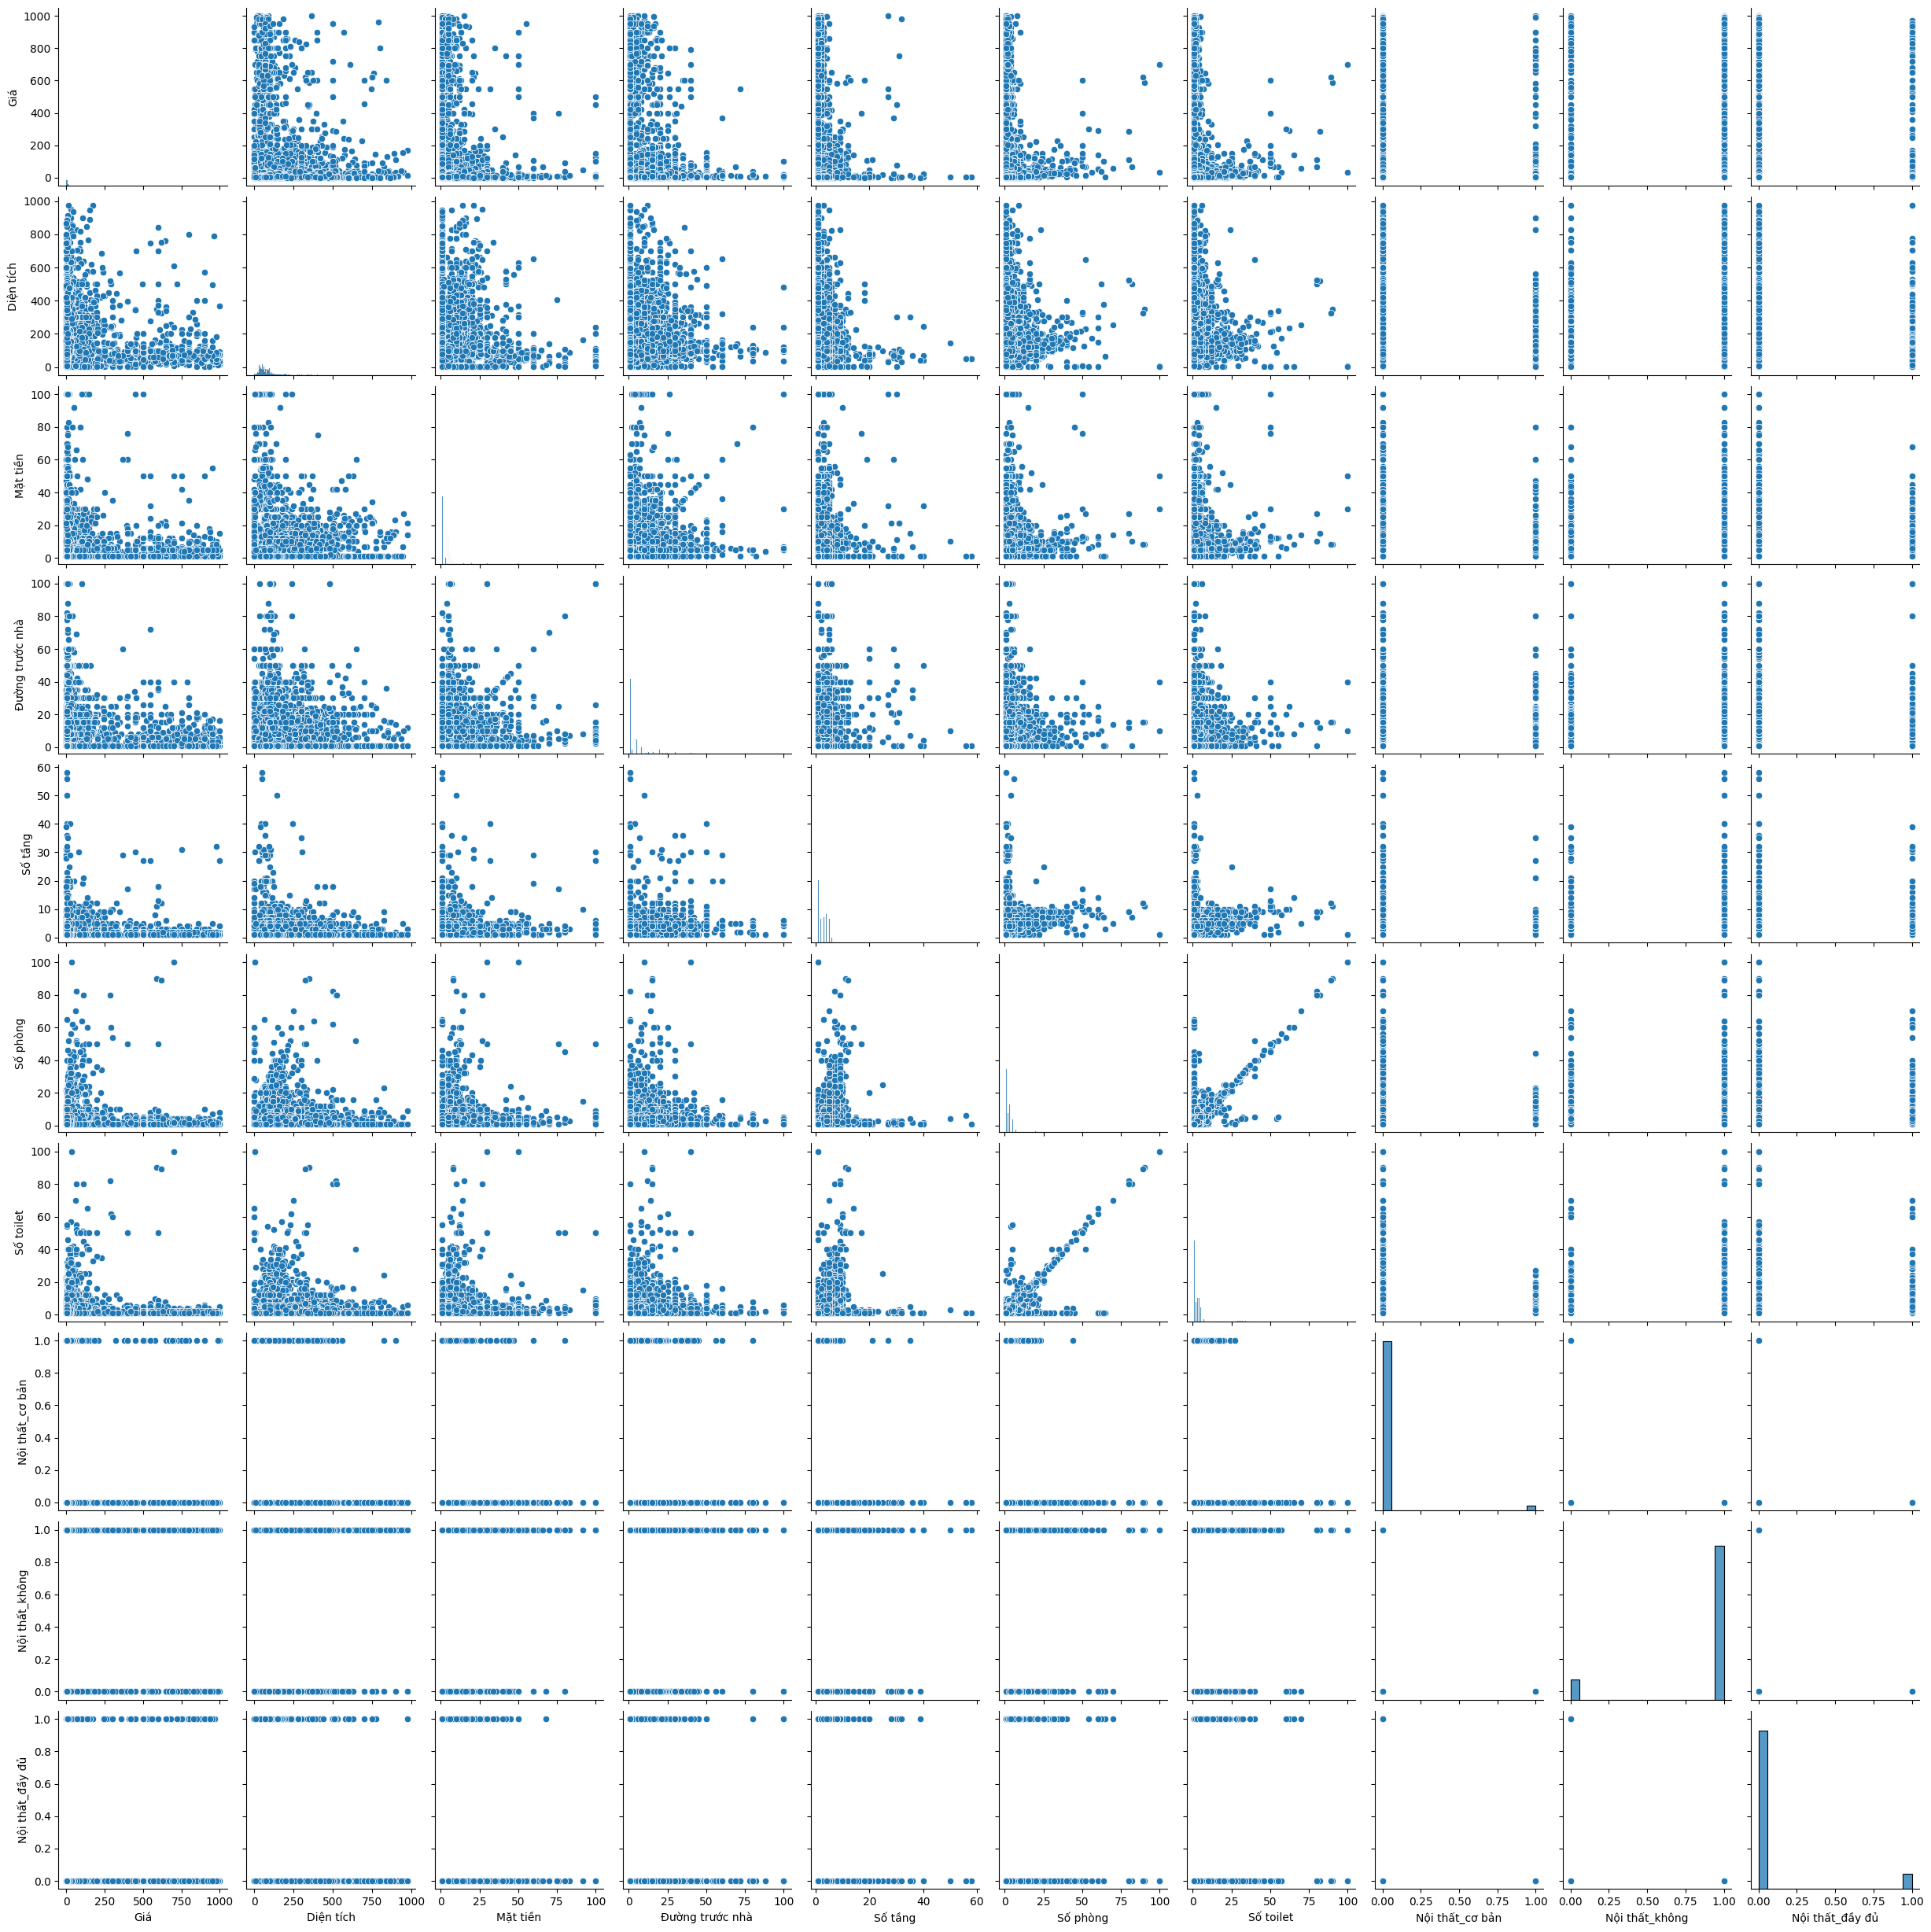

In [79]:
sns.pairplot(df)
plt.show()